In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First Analysis: TeamIDs vs Mean Rank for the years 1990-2016

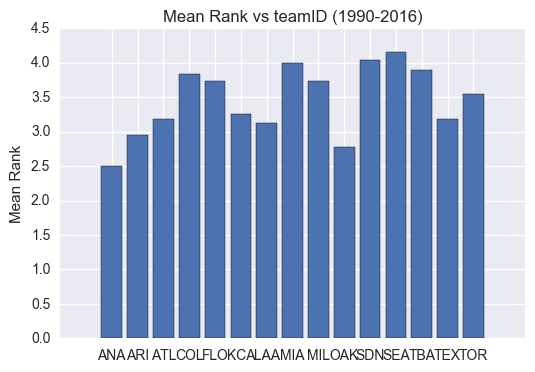

In [2]:
teams_df = pd.read_csv('Teams.csv')
grouped_by_teamID = teams_df.groupby('teamID', as_index=False).mean()
after_1990 = grouped_by_teamID.query('yearID>1990.0')
%matplotlib inline
x_pos = np.arange(len(after_1990['teamID']))
plt.bar(x_pos, after_1990['Rank'], align='center')
plt.xticks(x_pos, after_1990['teamID'])
plt.ylabel('Mean Rank')
plt.title('Mean Rank vs teamID (1990-2016)')

Second Analysis: Player's Batting Hand vs the Mean Hits, Runs and Home runs scored

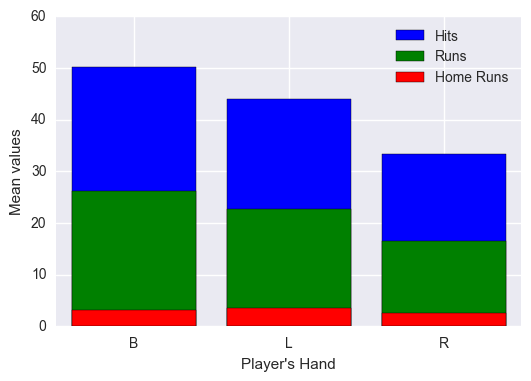

In [3]:
master_df = pd.read_csv('Master.csv')
batting_df = pd.read_csv('Batting.csv')
player_stats = master_df.merge(batting_df, on = 'playerID', how = 'inner')
batting_hand_Hits = player_stats.groupby('bats').mean()['H']
batting_hand_Runs = player_stats.groupby('bats').mean()['R']
batting_hand_HomeRuns = player_stats.groupby('bats').mean()['HR']
bats = player_stats.groupby('bats')
x_pos = np.arange(len(bats['bats']))
plt.bar(x_pos, bats.mean()['H'], label='Hits', color='Blue', align='center')
plt.bar(x_pos, bats.mean()['R'], label='Runs', color='Green', align='center')
plt.bar(x_pos, bats.mean()['HR'], label='Home Runs', color='Red', align='center')
plt.xticks(x_pos, [ind for ind, grp in bats['bats']])
plt.xlabel("Player's Hand")
plt.ylabel("Mean values")
plt.legend()

Third Analysis: Finding the player that has received the most number of "Most Valuable Player" awards

In [4]:
def max_occurences(x):
    maximum = 0
    for ind, grp in x:
        l = len(grp)
        if l>maximum:
            maximum = l
            pl_id = ind
    return pl_id, maximum

In [5]:
awards_players = pd.read_csv('AwardsPlayers.csv')
awards_players_mvp = awards_players.query('awardID == "Most Valuable Player"')
grouped_by_player = awards_players_mvp.groupby('playerID', as_index=False)
most_awards_player = max_occurences(grouped_by_player)
print "Player Name: "+master_df.loc[master_df.playerID == most_awards_player[0], 'nameGiven'].iloc[0]
print "Number of Most Valuable Player awards won: ", most_awards_player[1]

Player Name: Barry Lamar
Number of Most Valuable Player awards won:  7


Fourth Analysis: Player's Throwing Hand vs mean Hits, Homeruns allowed and Strikeouts

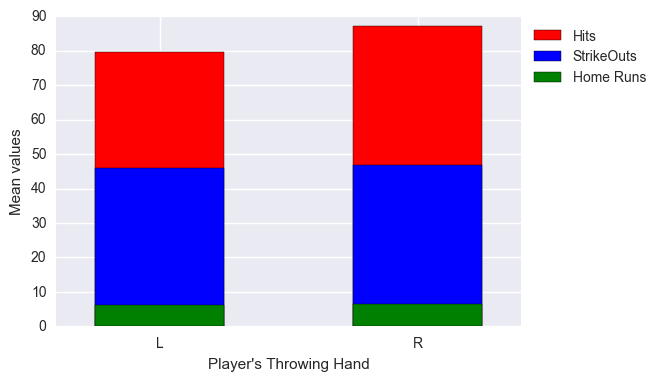

In [6]:
pitching_df = pd.read_csv("Pitching.csv")
pitching_stats = master_df.merge(pitching_df, on = 'playerID', how = 'inner')
pitching_stats_cleaned = pitching_stats[pitching_stats.throws != 'S']
grouped_by_throwing_hand = pitching_stats_cleaned.groupby('throws')
x_pos = np.arange(len(grouped_by_throwing_hand['throws']))
plt.bar(x_pos, grouped_by_throwing_hand.mean()['H'], label='Hits', color = 'red', width = 0.5, align = 'center')
plt.bar(x_pos, grouped_by_throwing_hand.mean()['SO'], label='StrikeOuts', color = 'blue', width = 0.5, align = 'center')
plt.bar(x_pos, grouped_by_throwing_hand.mean()['HR'], label='Home Runs', color = 'green', width = 0.5, align = 'center')
plt.xticks(x_pos, [ind for ind, grp in grouped_by_throwing_hand['throws']])
plt.xlabel("Player's Throwing Hand")
plt.ylabel("Mean values")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In the below analysis, I want to plot Player's height vs 'AB' and 'BB':

In [8]:
x = player_stats.groupby('height').mean()['AB']
y = player_stats.groupby('height').mean()['BB']


In the below analysis, I want to plot (the number of times a manager has won the BBWAA award) vs (Win to Loss ratio)  

In [18]:
manager_awards_df = pd.read_csv("AwardsManagers.csv")
manager_awards_BBWAA = manager_awards_df.query('awardID == "BBWAA Manager of the Year"')
grouped_awards_manager = manager_awards_BBWAA.groupby('playerID', as_index=False).mean()
playerID_list = manager_awards_BBWAA['playerID']
#print len(grouped_awards_manager.playerID)
managers_df = pd.read_csv("Managers.csv")
managers_df_Filtered = managers_df[managers_df.playerID.isin(playerID_list)]
grouped_managers = managers_df_Filtered.groupby('playerID', as_index=False).mean()
#print len(grouped_managers.playerID)
manager_stats = grouped_awards_manager.merge(grouped_managers, on='playerID', how='inner')[['playerID', 'G', 'W', 'L']]
manager_stats['Win_Loss_Ratio'] = pd.Series(manager_stats.W/manager_stats.L)
#size = manager_awards_BBWAA.groupby('playerID', as_index=False).size()
#manager_stats['Num_Of_Awards'] = pd.Series(size)
manager_stats

,playerID,G,W,L,Win_Loss_Ratio
0,aloufe01,146.714286,73.785714,72.928571,1.011753
1,andersp01,155.000000,84.384615,70.538462,1.196292
2,bakerdu01,158.952381,84.095238,74.809524,1.124125
3,banisje01,162.000000,91.500000,70.500000,1.297872
4,baylodo01,146.333333,69.666667,76.555556,0.910015
5,blackbu02,151.333333,72.111111,79.222222,0.910238
6,bochybr01,161.181818,81.318182,79.863636,1.018213
7,bowala01,142.166667,69.666667,72.500000,0.960920
8,coxbo01,155.448276,86.344828,69.000000,1.251374
9,dierkla01,130.500000,72.500000,58.000000,1.250000


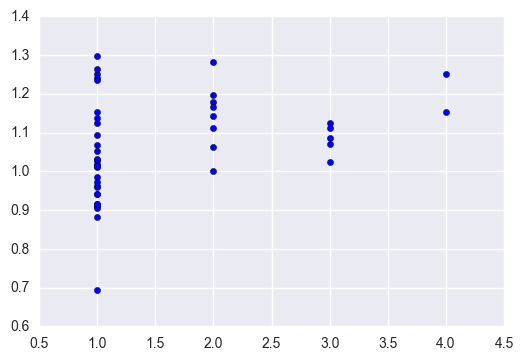

In [17]:
plt.scatter(manager_awards_BBWAA.groupby('playerID', as_index=False).size(), manager_stats['Win_Loss_Ratio'])